# Asset replication

Asset replication can be used to hedging or mean-reversion trading purposes.

In [11]:
import pod
import pandas
import zipfile
from io import StringIO
from typing import List
from datetime import date

path_data = '../data'
daily_data = []
for year in range(2018, 2023):
    with zipfile.ZipFile(f"{path_data}/NYSE_{year}.zip", "r") as zip_file:
        for file in zip_file.namelist():
            with zip_file.open(file, "r") as zip_entry:
                current_data = zip_entry.read().decode('utf-8')
                current_day = pandas.read_csv(StringIO(current_data), dtype={
                    'Symbol': 'string',
                    'Date': 'string',
                    'Open': 'float64',
                    'High': 'float64',
                    'Close': 'float64',
                    'Volume': 'int64'
                }, parse_dates=['Date'], date_format="%d-%b-%Y")
                daily_data.append(current_day)

market_data = pandas.concat(daily_data)
prices = market_data[['Date', 'Symbol', 'Close']].pivot_table(index='Date', columns='Symbol', values='Close').ffill()

## Defining training set (from 2018 through 2021) and test set (year 2022)

In [ ]:
train_prices = prices.loc[prices.index < pandas.to_datetime(date(2022, 1, 1))]
test_prices = prices.loc[prices.index >= pandas.to_datetime(date(2022, 1, 1))]

## Restricting the universe to biggest caps

In [12]:
big_caps = (
'MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB',
'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG',
'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET',
'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB',
'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO',
'BF.B', 'BG', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE',
'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO',
'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT',
'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY',
'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DIS', 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DD', 'DXC', 'EMN',
'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'ELV', 'LLY', 'EMR', 'ENPH', 'ETR', 'EOG', 'EPAM', 'EQT', 'EFX', 'EQIX', 'EQR',
'ESS', 'EL', 'ETSY', 'EG', 'EVRG', 'ES', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS', 'FICO', 'FAST', 'FRT',
'FDX', 'FITB', 'FSLR', 'FE', 'FIS', 'FI', 'FLT', 'FMC', 'F', 'FTNT', 'FTV', 'FOXA', 'FOX', 'BEN', 'FCX', 'GRMN', 'IT',
'GEHC', 'GEN', 'GNRC', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GL', 'GPN', 'GS', 'HAL', 'HIG', 'HAS', 'HCA', 'PEAK',
'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII', 'IBM', 'IEX',
'IDXX', 'ITW', 'ILMN', 'INCY', 'IR', 'PODD', 'INTC', 'ICE', 'IFF', 'IP', 'IPG', 'INTU', 'ISRG', 'IVZ', 'INVH', 'IQV',
'IRM', 'JBHT', 'JKHY', 'J', 'JNJ', 'JCI', 'JPM', 'JNPR', 'K', 'KDP', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KHC',
'KR', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LDOS', 'LEN', 'LNC', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'MTB',
'MRO', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MTCH', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'META', 'MET', 'MTD',
'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MRNA', 'MHK', 'MOH', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI',
'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NKE', 'NI', 'NDSN', 'NSC', 'NTRS', 'NOC', 'NCLH',
'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'ORLY', 'OXY', 'ODFL', 'OMC', 'ON', 'OKE', 'ORCL', 'OGN', 'OTIS', 'PCAR', 'PKG',
'PANW', 'PARA', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PNR', 'PEP', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'POOL',
'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PTC', 'PSA', 'PHM', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF',
'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RVTY', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC',
'SLB', 'STX', 'SEE', 'SRE', 'NOW', 'SHW', 'SPG', 'SWKS', 'SJM', 'SNA', 'SEDG', 'SO', 'LUV', 'SWK', 'SBUX', 'STT',
'STLD', 'STE', 'SYK', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TRGP', 'TGT', 'TEL', 'TDY', 'TFX', 'TER',
'TSLA', 'TXN', 'TXT', 'TMO', 'TJX', 'TSCO', 'TT', 'TDG', 'TRV', 'TRMB', 'TFC', 'TYL', 'TSN', 'USB', 'UDR', 'ULTA',
'UNP', 'UAL', 'UPS', 'URI', 'UNH', 'UHS', 'VLO', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VFC', 'VTRS', 'VICI', 'V', 'VMC',
'WAB', 'WBA', 'WMT', 'WBD', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WRK', 'WY', 'WHR', 'WMB', 'WTW', 'GWW',
'WYNN', 'XEL', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS')


## Define the target here

In [13]:
target = 'CVX'

## Now running the model on the training data

In [14]:
performances = train_prices.pct_change().dropna(how='all', axis=0).dropna(how='any', axis=1)
companies = list(sorted(set(performances.columns.values.tolist()).intersection(big_caps).difference({target})))
features = performances.loc[:, list(companies)]
decomposition = pod.decompose(performances[target].values.tolist(), features.transpose().values.tolist(), epsilon=1E-6, max_iter=90, max_factors=5)

def performance(performances: pandas.DataFrame, stock: str) -> List[float]:
    return performances[stock].values.tolist()


def stocks(performances: pandas.DataFrame) -> List[str]:
    return performances.columns.tolist()

## Displaying results

In [15]:
comp_index_1 = decomposition.get_principal_component_index(0)
comp_index_2 = decomposition.get_principal_component_index(1)
comp_index_3 = decomposition.get_principal_component_index(2)
comp_index_4 = decomposition.get_principal_component_index(3)
comp_index_5 = decomposition.get_principal_component_index(4)
weight1 = decomposition.reference_weights[comp_index_1]
weight2 = decomposition.reference_weights[comp_index_2]
weight3 = decomposition.reference_weights[comp_index_3]
weight4 = decomposition.reference_weights[comp_index_4]
weight5 = decomposition.reference_weights[comp_index_5]
print(companies[comp_index_1], weight1)
print(companies[comp_index_2], weight2)
print(companies[comp_index_3], weight3)
print(companies[comp_index_4], weight4)
print(companies[comp_index_5], weight5)

XOM 0.3084866004643928
COP 0.2786798383715602
KMI 0.2377540534536145
ITW 0.14543150395336008
ETR 0.1132109459644928


## In-samples results

<Axes: xlabel='Date'>

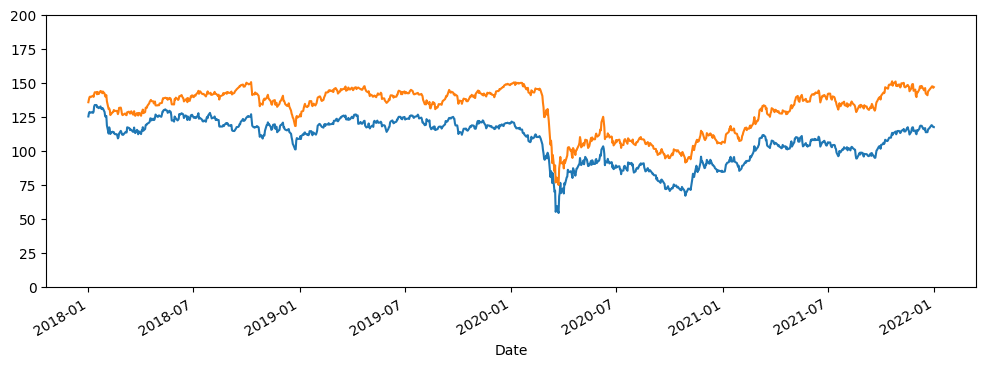

In [16]:
prices[target].loc[train_prices.index].plot(ylim=(0, 200))
ref_price = prices[target].loc[prices.index[0]]
comp1 = 'XOM'
comp2 = 'COP'
comp3 = 'KMI'
comp4 = 'ITW'
comp5 = 'ETR'
(weight1 * train_prices[comp1]*ref_price/train_prices[comp1][0] 
 + weight2 * train_prices[comp2]*ref_price/train_prices[comp2][0] 
 + weight3 * train_prices[comp3]*ref_price/train_prices[comp3][0]
 + weight4 * train_prices[comp4]*ref_price/train_prices[comp4][0]
 + weight5 * train_prices[comp5]*ref_price/train_prices[comp5][0]
).plot(figsize=(12, 4))

## Out-of-samples results

<Axes: xlabel='Date'>

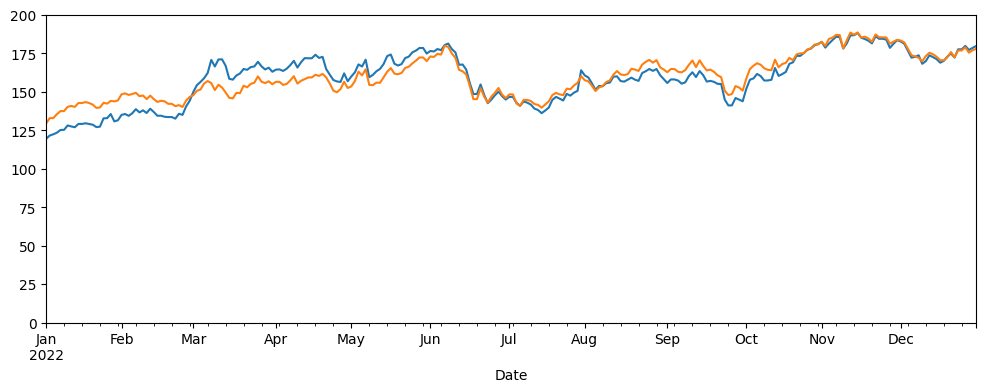

In [17]:
prices[target].loc[test_prices.index].plot(ylim=(0, 200))
ref_price = prices[target].loc[test_prices.index[0]]
(weight1 * test_prices[comp1]*ref_price/test_prices[comp1][0] 
 + weight2 * test_prices[comp2]*ref_price/test_prices[comp2][0] 
 + weight3 * test_prices[comp3]*ref_price/test_prices[comp3][0]
 + weight4 * test_prices[comp4]*ref_price/test_prices[comp4][0]
 + weight5 * test_prices[comp5]*ref_price/test_prices[comp5][0]
).plot(figsize=(12, 4))